In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from quadtree.point import Point
from quadtree.rect import Rect
from quadtree.quadtree import QuadTree
from matplotlib import gridspec
from utils import image_resize

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
DPI = 72

width = 500

img = cv2.imread('../data/brain.jpg',0) # reads image 'opencv-logo.png' as grayscale
img = image_resize(img, width=width)
ret,thr = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thr,0,255)
indices = np.where(edges != 0)
points = [Point(*coord) for coord in zip(indices[1], indices[0])]
                   
height, _ = img.shape[:2]

domain = Rect(width/2, height/2, width, height)
qtree = QuadTree(domain, 10)
for point in points:
    qtree.insert(point)

print('Number of points in the domain =', len(qtree))

Number of points in the domain = 2790


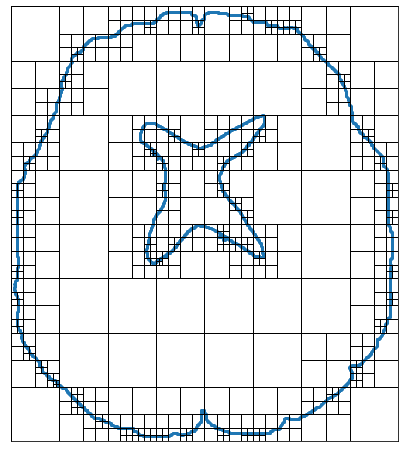

In [4]:
fig = plt.figure(figsize=(width/DPI, height/DPI), dpi=DPI)
ax = plt.subplot()
ax.set_xlim(0, width)
ax.set_ylim(height, 0)
qtree.draw(ax)

ax.scatter([p.x for p in points], [p.y for p in points], s=4)
ax.set_xticks([])
ax.set_yticks([])
plt.show()